# Practice creating an xarray

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

# DataArray

In [5]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])

In [6]:
foo

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [7]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Dimensions without coordinates: dim_0, dim_1

## Coordinates

Coordinates can be specified in the following ways:

A list of values with length equal to the number of dimensions, providing coordinate labels for each dimension. Each value must be of one of the following forms:

A DataArray or Variable

A tuple of the form (dims, data[, attrs]), which is converted into arguments for Variable

A pandas object or scalar value, which is converted into a DataArray

A 1D array or list, which is interpreted as values for a one dimensional coordinate variable along the same dimension as it’s name

A dictionary of {coord_name: coord} where values are of the same form as the list. Supplying coordinates as a dictionary allows other coordinates than those corresponding to dimensions (more on these later). If you supply coords as a dictionary, you must explicitly provide dims.

In [8]:
# As a list of tuples
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [9]:
# As a dictionary
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (space) int64 24B 1 2 3

### This is what I can use to define coordinates. Dims will always be x, y, z...

In [10]:
# As a dictionary with coords across multiple dimensions
xr.DataArray(
    data,
    coords={
        "time": times,
        "space": locs,
        "const": 42,
        "ranking": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"],
)

<xarray.DataArray (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (time, space) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11

In [12]:
_["ranking"]

<xarray.DataArray 'ranking' (time: 4, space: 3)> Size: 96B
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    const    int64 8B 42
    ranking  (time, space) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11

## DataArray properties

In [15]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'

In [16]:
foo.name = "foo"
foo.attrs["units"] = "meters"

In [17]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [21]:
foo.rename("bar")

<xarray.DataArray 'bar' (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

## DataArray Coordinates

The coords property is dict like. Individual coordinates can be accessed from the coordinates by name, or even by indexing the data array itself:

In [22]:
foo.coords["time"]

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04

In [23]:
foo["time"]

<xarray.DataArray 'time' (time: 4)> Size: 32B
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04

These are also DataArray objects, which contain tick-labels for each dimension.

Coordinates can also be set or removed by using the dictionary like syntax:

In [24]:
foo["add_dim"] = ("space", [1, 2, 3])

In [25]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
    add_dim  (space) int64 24B 1 2 3
Attributes:
    units:    meters

In [27]:
del foo["add_dim"]

In [28]:
foo

<xarray.DataArray 'foo' (time: 4, space: 3)> Size: 96B
array([[0.18980218, 0.14856164, 0.06568533],
       [0.79230623, 0.87756322, 0.30472757],
       [0.71195524, 0.9448902 , 0.92213918],
       [0.25097775, 0.55722723, 0.56113101]])
Coordinates:
  * time     (time) datetime64[ns] 32B 2000-01-01 2000-01-02 ... 2000-01-04
  * space    (space) <U2 24B 'IA' 'IL' 'IN'
Attributes:
    units:    meters

# Dataset

xarray.Dataset is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

In [29]:
# creating a dataset
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity
ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)

In [31]:
ds

<xarray.Dataset> Size: 288B
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 96B 10.98 10.36 27.3 ... 12.31 7.872
    precipitation   (x, y, time) float64 96B 2.79 3.286 9.484 ... 7.82 1.448

In [38]:
ds["temperature"] + 1j * ds["precipitation"]

<xarray.DataArray (x: 2, y: 2, time: 3)> Size: 192B
array([[[10.98018024+2.79045541j, 10.35668648+3.28613702j,
         27.29942744+9.48417112j],
        [19.70927764+5.77403127j, 19.33510383+8.97550868j,
         21.21083176+8.40218471j]],

       [[13.85604491+2.57824571j,  6.50093598+0.31289494j,
          7.42354866+5.26863936j],
        [17.39641593+3.02994217j, 12.31102638+7.81991687j,
          7.87189692+1.44843024j]]])
Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: x, y

In [41]:
np.angle(_.values)

array([[[0.24886725, 0.30724835, 0.33436813],
        [0.28498569, 0.43460623, 0.37716319]],

       [[0.18396975, 0.04809364, 0.61721957],
        [0.17244069, 0.56589782, 0.18196483]]])

In [42]:
ds.data_vars

Data variables:
    temperature    (x, y, time) float64 96B 10.98 10.36 27.3 ... 12.31 7.872
    precipitation  (x, y, time) float64 96B 2.79 3.286 9.484 ... 3.03 7.82 1.448

In [43]:
ds.coords

Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05

In [44]:
ds.coords["lon"].attrs["long name"] = "longitude"

In [46]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)> Size: 96B
array([[[10.98018024, 10.35668648, 27.29942744],
        [19.70927764, 19.33510383, 21.21083176]],

       [[13.85604491,  6.50093598,  7.42354866],
        [17.39641593, 12.31102638,  7.87189692]]])
Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: x, y

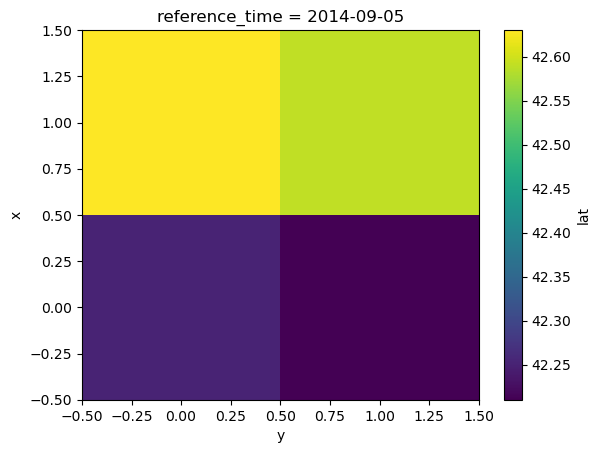

In [60]:
ds.temperature["lat"].plot()

In [52]:
ds["temperature"]

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)> Size: 96B
array([[[10.98018024, 10.35668648, 27.29942744],
        [19.70927764, 19.33510383, 21.21083176]],

       [[13.85604491,  6.50093598,  7.42354866],
        [17.39641593, 12.31102638,  7.87189692]]])
Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: x, y

In [65]:
ds.attrs = {"test_dict":{'a': 1,'b': 2,'c': {"more_complicated": 3}},"long_name": "temperature and precipitation"}

In [66]:
ds

<xarray.Dataset> Size: 288B
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 32B -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 32B 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 24B 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 8B 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 96B 10.98 10.36 27.3 ... 12.31 7.872
    precipitation   (x, y, time) float64 96B 2.79 3.286 9.484 ... 7.82 1.448
Attributes:
    test_dict:  {'a': 1, 'b': 2, 'c': {'more_complicated': 3}}
    long_name:  temperature and precipitation

In [67]:
ds.attrs["test_dict"]

{'a': 1, 'b': 2, 'c': {'more_complicated': 3}}

In [70]:
ds.attrs["test_dict"]["c"]["more_complicated"]

3

In [79]:
for keys in ds.attrs:
    print(keys)

test_dict
long_name
